### gym

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
import gym

In [5]:
space_names=['观测空间','动作空间','奖励范围','最大步数']
df=pd.DataFrame(columns=space_names)

env_specs=gym.envs.registry.all()
# print(env_specs)
for env_spec in env_specs:
    env_id = env_spec.id
    try:
        env = gym.make(env_id)
        observation_space = env.observation_space
        action_space = env.action_space
        reward_range = env.reward_range
        max_episode_steps = None
        if isinstance(env, gym.wrappers.time_limit.TimeLimit):
            max_episode_steps = env._max_episode_steps
        df.loc[env_id] = [observation_space, action_space, reward_range, max_episode_steps]
    except:
        pass

with pd.option_context('display.max_rows',None):
    display(df)

,观测空间,动作空间,奖励范围,最大步数
Copy-v0,Discrete(6),"(Discrete(2), Discrete(2), Discrete(5))","(-inf, inf)",200
RepeatCopy-v0,Discrete(6),"(Discrete(2), Discrete(2), Discrete(5))","(-inf, inf)",200
ReversedAddition-v0,Discrete(4),"(Discrete(4), Discrete(2), Discrete(3))","(-inf, inf)",200
ReversedAddition3-v0,Discrete(4),"(Discrete(4), Discrete(2), Discrete(3))","(-inf, inf)",200
DuplicatedInput-v0,Discrete(6),"(Discrete(2), Discrete(2), Discrete(5))","(-inf, inf)",200
Reverse-v0,Discrete(3),"(Discrete(2), Discrete(2), Discrete(2))","(-inf, inf)",200
CartPole-v0,"Box(4,)",Discrete(2),"(-inf, inf)",200
CartPole-v1,"Box(4,)",Discrete(2),"(-inf, inf)",500
MountainCar-v0,"Box(2,)",Discrete(3),"(-inf, inf)",200
MountainCarContinuous-v0,"Box(2,)","Box(1,)","(-inf, inf)",999


In [9]:
env=gym.make('MountainCar-v0')
print('观测空间={}'.format(env.observation_space))
print('动作范围={}'.format(env.action_space))
print('观测范围={}~{}'.format(env.observation_space.low,env.observation_space.high))
print('动作数={}'.format(env.action_space.n))

观测空间=Box(2,)
动作范围=Discrete(3)
观测范围=[-1.2  -0.07]~[0.6  0.07]
动作数=3


In [10]:
class BespokeAgent:
    def __init__(self,env):
        pass
    def decide(self,observation):
        position,velocity=observation
        lb = min(-0.09 * (position + 0.25) ** 2 + 0.03,0.3 * (position + 0.9) ** 4 - 0.008)
        ub = -0.07 * (position + 0.38) ** 2 + 0.07
        if lb<velocity<ub:
            action=2
        else:
            action=0
        return action
    def learn(self,*args):
        pass
    
agent=BespokeAgent(env)

In [17]:
def play_montecarlo(env,agent,render=False,train=False):
    episode_reward=0
    observation=env.reset()
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,done)
        if done:
            break
        observation=next_observation
    return episode_reward

In [20]:
env.seed(0)
episode_reward=play_montecarlo(env,agent,render=True)
print('回合奖励={}'.format(episode_reward))
env.close()

回合奖励=-105.0


In [24]:
# episode_rewards = [play_montecarlo(env, agent,render=True) for _ in range(100)]
# print('平均回合奖励 = {}'.format(np.mean(episode_rewards)))
# env=gym.make('CartPole-v0')
env=gym.make('MountainCar-v0')
for i in range(10):
    episode_reward=play_montecarlo(env,agent,render=True)
    print('回合奖励:',episode_reward)
    print('第{}回合完成'.format(i))

回合奖励: -119.0
第0回合完成
回合奖励: -135.0
第1回合完成
回合奖励: -103.0
第2回合完成
回合奖励: -104.0
第3回合完成
回合奖励: -105.0
第4回合完成
回合奖励: -162.0
第5回合完成
回合奖励: -85.0
第6回合完成
回合奖励: -104.0
第7回合完成
回合奖励: -105.0
第8回合完成
回合奖励: -105.0
第9回合完成


### Markov决策过程

In [25]:
import numpy as np
np.random.seed(0)
import scipy
import gym

In [30]:
env=gym.make('CliffWalking-v0')
env.seed(0)
print('观测空间={}'.format(env.observation_space))
print('动作空间={}'.format(env.action_space))
print('状态数量={}，动作数量={}'.format(env.nS,env.nA))
print('地图大小={}'.format(env.shape))

观测空间=Discrete(48)
动作空间=Discrete(4)
状态数量=48，动作数量=4
地图大小=(4, 12)


In [37]:
def play_once(env,policy):
    total_reward=0
    state=env.reset()
    loc=np.unravel_index(state,env.shape)
    print('状态={}，位置={}'.format(state,loc))
    while True:
        action=np.random.choice(env.nA,p=policy[state])
        next_state,reward,done,_=env.step(action)
        print('状态={}，位置={}，奖励={}'.format(state,loc,reward))
        total_reward+=reward
        if done:
            break
        state=next_state
    return total_reward

In [47]:
actions=np.ones(env.shape,dtype=int)
actions[-1,:]=0
actions[:,-1]=2
optimal_policy=np.eye(4)[actions.reshape(-1)]
print(optimal_policy.shape)

(48, 4)


In [40]:
total_reward=play_once(env,optimal_policy)
print('回合奖励={}'.format(total_reward))

状态=36，位置=(3, 0)
状态=36，位置=(3, 0)，奖励=-1
状态=24，位置=(3, 0)，奖励=-1
状态=25，位置=(3, 0)，奖励=-1
状态=26，位置=(3, 0)，奖励=-1
状态=27，位置=(3, 0)，奖励=-1
状态=28，位置=(3, 0)，奖励=-1
状态=29，位置=(3, 0)，奖励=-1
状态=30，位置=(3, 0)，奖励=-1
状态=31，位置=(3, 0)，奖励=-1
状态=32，位置=(3, 0)，奖励=-1
状态=33，位置=(3, 0)，奖励=-1
状态=34，位置=(3, 0)，奖励=-1
状态=35，位置=(3, 0)，奖励=-1
回合奖励=-13


In [52]:
def evaluate_bellman(env,policy,gamma=1.):
    a,b=np.eye(env.nS),np.zeros((env.nS))
    for state in range(env.nS-1):
        for action in range(env.nA):
            pi=policy[state][action]
            for p,next_state,reward,done in env.P[state][action]:
                a[state,next_state]-=(pi*gamma)
                b[state]+=(pi*reward*p)
    v=np.linalg.solve(a,b)
    q=np.zeros((env.nS,env.nA))
    for state in range(env.nS-1):
        for action in range(env.nA):
            for p,next_state,reward,done in env.P[state][action]:
                q[state][action]+=(reward+gamma*v[next_state])*p
    return v,q

In [55]:
policy=np.random.uniform(size=(env.nS,env.nA))
policy=policy/np.sum(policy,axis=1)[:,np.newaxis]

state_values,action_values=evaluate_bellman(env,policy)
print('状态价值={}'.format(state_values))
print('动作价值={}'.format(action_values))

状态价值=[-439258.92022552 -439205.04983834 -438854.72370367 -438300.96239801
 -437484.94983967 -436637.06968971 -430134.21021581 -418750.91788927
 -409425.14021916 -394032.40138462 -368779.65604086 -356449.28878302
 -439258.48885126 -439189.40862099 -438700.14704092 -438241.47581122
 -437799.80236697 -436512.90306693 -433205.02759955 -423481.09984468
 -411568.40818854 -404697.93115442 -367829.4280029  -294059.01953124
 -439312.29934549 -439301.57082081 -439044.36234822 -438459.64161124
 -438459.87605349 -437771.31181438 -436934.94437234 -434798.87730719
 -429407.0441337  -423469.51182897 -358874.48026513 -124738.02430387
 -439408.46475351 -439481.98025352 -439415.52475053 -439152.96790044
 -439339.20031041 -439415.35442743 -438770.88036401 -437336.22431838
 -437327.04574522 -433587.73746858 -307831.05001827       0.        ]
动作价值=[[-4.39259920e+05 -4.39206050e+05 -4.39259489e+05 -4.39259920e+05]
 [-4.39206050e+05 -4.38855724e+05 -4.39190409e+05 -4.39259920e+05]
 [-4.38855724e+05 -4.383019

In [56]:
optimal_state_values, optimal_action_values = evaluate_bellman(env, optimal_policy)
print('最优状态价值 = {}'.format(optimal_state_values))
print('最优动作价值 = {}'.format(optimal_action_values))

最优状态价值 = [-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3. -13. -12.
 -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1. -13. -12. -11. -10.  -9.  -8.
  -7.  -6.  -5.  -4.  -3.   0.]
最优动作价值 = [[ -15.  -14.  -14.  -15.]
 [ -14.  -13.  -13.  -15.]
 [ -13.  -12.  -12.  -14.]
 [ -12.  -11.  -11.  -13.]
 [ -11.  -10.  -10.  -12.]
 [ -10.   -9.   -9.  -11.]
 [  -9.   -8.   -8.  -10.]
 [  -8.   -7.   -7.   -9.]
 [  -7.   -6.   -6.   -8.]
 [  -6.   -5.   -5.   -7.]
 [  -5.   -4.   -4.   -6.]
 [  -4.   -4.   -3.   -5.]
 [ -15.  -13.  -13.  -14.]
 [ -14.  -12.  -12.  -14.]
 [ -13.  -11.  -11.  -13.]
 [ -12.  -10.  -10.  -12.]
 [ -11.   -9.   -9.  -11.]
 [ -10.   -8.   -8.  -10.]
 [  -9.   -7.   -7.   -9.]
 [  -8.   -6.   -6.   -8.]
 [  -7.   -5.   -5.   -7.]
 [  -6.   -4.   -4.   -6.]
 [  -5.   -3.   -3.   -5.]
 [  -4.   -3.   -2.   -4.]
 [ -14.  -12.  -14.  -13.]
 [ -13.  -11. -113.  -13.]
 [ -12.  -10. -113.  -12.]
 [ -11. 

In [57]:
def optimal_bellman(env,gamma=1):
    p=np.zeros((env.nS,env.nA,env.nS))
    r=np.zeros((env.nS,env.nA))
    for state in range(env.nS-1):
        for action in range(env.nA):
            for prob,next_state,reward,done in env.P[state][action]:
                p[state,action,next_state]+=prob
                r[state,action]+=reward*prob
    c=np.ones(env.nS)
    a_ub=gamma*p.reshape(-1,env.nS)-np.repeat(np.eye(env.nS),env.nA,axis=0)
    b_ub=-r.reshape(-1)
    a_eq=np.zeros((0,env.nS))
    b_eq=np.zeros(0)
    bounds=[(None,None),]*env.nS
    res=scipy.optimize.linprog(c,a_ub,b_ub,bounds=bounds,method='interior-point')
    v=res.x
    q=r+gamma*np.dot(p,v)
    return v,q

In [58]:
optimal_state_values, optimal_action_values = optimal_bellman(env)
print('最优状态价值 = {}'.format(optimal_state_values))
print('最优动作价值 = {}'.format(optimal_action_values))

最优状态价值 = [-1.40000000e+01 -1.30000000e+01 -1.20000000e+01 -1.10000000e+01
 -1.00000000e+01 -9.00000000e+00 -8.00000000e+00 -7.00000000e+00
 -6.00000000e+00 -5.00000000e+00 -4.00000000e+00 -3.00000000e+00
 -1.30000000e+01 -1.20000000e+01 -1.10000000e+01 -1.00000000e+01
 -9.00000000e+00 -8.00000000e+00 -7.00000000e+00 -6.00000000e+00
 -5.00000000e+00 -4.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -1.20000000e+01 -1.10000000e+01 -1.00000000e+01 -9.00000000e+00
 -8.00000000e+00 -7.00000000e+00 -6.00000000e+00 -5.00000000e+00
 -4.00000000e+00 -3.00000000e+00 -2.00000000e+00 -1.00000000e+00
 -1.30000000e+01 -1.20000000e+01 -1.10000000e+01 -1.00000000e+01
 -9.00000000e+00 -8.00000000e+00 -7.00000000e+00 -6.00000000e+00
 -5.00000000e+00 -4.00000000e+00 -9.99999999e-01  1.82211617e-11]
最优动作价值 = [[ -14.99999999  -13.99999999  -13.99999999  -14.99999999]
 [ -13.99999999  -13.          -13.          -14.99999999]
 [ -13.          -12.          -12.          -13.99999999]
 [ -12.          -11.   

### 有模型数值迭代

In [60]:
import numpy as np
np.random.seed(0)
import gym

In [63]:
env=gym.make('FrozenLake-v0')
env.seed(0)
print('观察空间={}'.format(env.observation_space))
print('动作空间={}'.format(env.action_space))
print('观测空间大小={}'.format(env.unwrapped.nS))
print('动作空间大小={}'.format(env.unwrapped.nA))
env.unwrapped.P[14][2]

观察空间=Discrete(16)
动作空间=Discrete(4)
观测空间大小=16
动作空间大小=4


[(0.3333333333333333, 14, 0.0, False),
 (0.3333333333333333, 15, 1.0, True),
 (0.3333333333333333, 10, 0.0, False)]

In [73]:
def play_policy(env,policy,render=False):
    total_reward=0
    observation=env.reset()
#     print(observation)
    while True:
        if render:
            env.render()
        action=np.random.choice(env.action_space.n,p=policy[observation])
        observation,reward,done,_=env.step(action)
#         while True:
#             print(observation)
#             break
        total_reward+=reward
        if done:
            break
    return total_reward

In [74]:
random_policy=np.ones((env.unwrapped.nS,env.unwrapped.nA))/env.unwrapped.nA

for _ in range(10):
    episode_reward=play_policy(env,random_policy)
    print('奖励={}'.format(episode_reward))

奖励=0.0
奖励=0.0
奖励=0.0
奖励=0.0
奖励=0.0
奖励=1.0
奖励=0.0
奖励=0.0
奖励=0.0
奖励=0.0


In [79]:
def v2q(env,v,s=None,gamma=1):
    if s is not None:
        q=np.zeros(env.unwrapped.nA)
        for a in range(env.unwrapped.nA):
            for prob,next_state,reward,done in env.unwrapped.P[s][a]:
                q[a]+=prob*(reward+gamma*v[next_state]*(1.-done))
    else:
        q=np.zeros((env.unwrapped.nS,env.unwrapped.nA))
        for s in range(env.unwrapped.nS):
            q[s]=v2q(env,v,s,gamma)
    return q

def evaluate_policy(env,policy,gamma=1,tolerant=1e-6):
    v=np.zeros(env.unwrapped.nS)
    while True:
        delta=0
        for s in range(env.unwrapped.nS):
            vs=sum(policy[s]*v2q(env,v,s,gamma))
            delta=max(delta,abs(v[s]-vs))
            v[s]=vs
        if delta<tolerant:
            break
    return v

In [81]:
print('状态价值函数：')
v_random=evaluate_policy(env,random_policy)
print(v_random.reshape(4,4))
print('动作价值函数：')
q_random=v2q(env,v_random)
print(q_random)

状态价值函数：
[[0.0139372  0.01162942 0.02095187 0.01047569]
 [0.01624741 0.         0.04075119 0.        ]
 [0.03480561 0.08816967 0.14205297 0.        ]
 [0.         0.17582021 0.43929104 0.        ]]
动作价值函数：
[[0.01470727 0.01393801 0.01393801 0.01316794]
 [0.00852221 0.01162969 0.01086043 0.01550616]
 [0.02444416 0.0209521  0.02405958 0.01435233]
 [0.01047585 0.01047585 0.00698379 0.01396775]
 [0.02166341 0.01701767 0.0162476  0.01006154]
 [0.         0.         0.         0.        ]
 [0.05433495 0.04735099 0.05433495 0.00698396]
 [0.         0.         0.         0.        ]
 [0.01701767 0.04099176 0.03480569 0.04640756]
 [0.0702086  0.11755959 0.10595772 0.05895286]
 [0.18940397 0.17582024 0.16001408 0.04297362]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08799662 0.20503708 0.23442697 0.17582024]
 [0.25238807 0.53837042 0.52711467 0.43929106]
 [0.         0.         0.         0.        ]]


In [82]:
def improve_policy(env,v,policy,gamma=1):
    optimal=True
    for s in range(env.unwrapped.nS):
        q=v2q(env,v,s,gamma)
        a=np.argmax(q)
        if policy[s][a]!=1:
            optimal=0.
            policy[s]=0.
            policy[s][a]=1.
    return optimal

In [84]:
policy=random_policy.copy()
optimal=improve_policy(env,v_random,policy)
if optimal:
    print('无更新，最优策略：')
else:
    print('有更新，更新后的策略为：')
print(policy)

有更新，更新后的策略为：
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [85]:
def iterate_policy(env,gamma=1,tolerant=1e-6):
    policy=np.ones((env.unwrapped.nS,env.unwrapped.nA))/env.unwrapped.nA
    while True:
        v=evaluate_policy(env,policy,gamma,tolerant)
        if improve_policy(env,v,policy):
            break
    return policy,v


policy_pi,v_pi=iterate_policy(env)
print('状态价值函数：')
print(v_pi.reshape(4,4))
print('最优策略：')
print(np.argmax(policy,axis=1).reshape(4,4))

状态价值函数：
[[0.82351246 0.82350689 0.82350303 0.82350106]
 [0.82351416 0.         0.5294002  0.        ]
 [0.82351683 0.82352026 0.76469786 0.        ]
 [0.         0.88234658 0.94117323 0.        ]]
最优策略：
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


In [86]:
epsiode_rewards=[play_policy(env,policy_pi) for _ in range(100)]
print('策略迭代 平均奖励：{}'.format(np.mean(epsiode_rewards)))

策略迭代 平均奖励：0.77


In [87]:
def iterate_value(env,gamma=1,tolerant=1e-6):
    v=np.zeros(env.unwrapped.nS)
    while True:
        delta=0
        for s in range(env.unwrapped.nS):
            vmax=max(v2q(env,v,s,gamma))
            delta=max(delta,abs(v[s]-vmax))
            v[s]=vmax
        if delta<tolerant:
            break
    policy=np.zeros((env.unwrapped.nS,env.unwrapped.nA))
    for s in range(env.unwrapped.nS):
        a=np.argmax(v2q(env,v,s,gamma))
        policy[s][a]=1.
    return policy,v

policy_vi,v_vi=iterate_value(env)
print('状态价值函数=')
print(v_vi.reshape(4,4))
print('最优策略=')
print(np.argmax(policy_vi,axis=1).reshape(4,4))

状态价值函数=
[[0.82351232 0.82350671 0.82350281 0.82350083]
 [0.82351404 0.         0.52940011 0.        ]
 [0.82351673 0.82352018 0.76469779 0.        ]
 [0.         0.88234653 0.94117321 0.        ]]
最优策略=
[[0 3 3 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


In [88]:
episode_rewards = [play_policy(env, policy_vi)  for _ in range(100)]
print("价值迭代 平均奖励：{}".format(np.mean(episode_rewards)))

价值迭代 平均奖励：0.67


### 回合更新价值迭代

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import gym

In [2]:
env=gym.make('Blackjack-v0')
env.seed(0)
print('观察空间={}'.format(env.observation_space))
print('动作空间={}'.format(env.action_space))
print('动作数量={}'.format(env.action_space.n))

观察空间=Tuple(Discrete(32), Discrete(11), Discrete(2))
动作空间=Discrete(2)
动作数量=2


In [3]:
observation=env.reset()
# print(observation)
print('观测={}'.format(observation))
while True:
    print('玩家={}，庄家={}'.format(env.player,env.dealer))
    action=np.random.choice(env.action_space.n)
    print('动作={}'.format(action))
    observation,reward,done,_=env.step(action)
    print('观测={},奖励={},结束指示={}'.format(observation,reward,done))
    if done:
        break

观测=(18, 1, False)
玩家=[10, 8]，庄家=[1, 7]
动作=0
观测=(18, 1, False),奖励=0.0,结束指示=True


In [4]:
def ob2state(observation):
    return observation[0],observation[1],int(observation[2])

def evaluate_action_montecalro(env,policy,episode_num=5000):
    q=np.zeros_like(policy)
    c=np.zeros_like(policy)
    for _ in range(episode_num):
        state_actions=[]
        observation=env.reset()
        while True:
            state=ob2state(observation)
            action=np.random.choice(env.action_space.n,p=policy[state])
            state_actions.append((state,action))
            observation,reward,done,_=env.step(action)
            if done:
                break
        g=reward
        for state,action in state_actions:
            c[state][action]+=1.
            q[state][action]+=(g-q[state][action])/c[state][action]
    return q

In [8]:
policy=np.zeros((22,11,2,2))
policy[20:,:,:,0]=1
policy[:20,:,:,1]=1
q=evaluate_action_montecalro(env,policy)
v=(q*policy).sum(axis=-1)

In [9]:
def plot(data):
    fig,axes=plt.subplots(1,2,figsize=(9,4))
    titles=['without ace','with ace']
    have_aces=[0,1]
    extent=[12,22,1,11]
    for title,have_ace,axis in zip(titles,have_aces,axes):
        dat=data[extent[0]:extent[1],extent[2]:extent[3],have_ace].T
        axis.imshow(dat,extent=extent,origin='lower')
        axis.set_xlabel('player sum')
        axis.set_ylabel('dealer showing')
        axis.set_title(title)

In [10]:
def play_once(env,policy=None):
    total_reward=0
    observation=env.reset()
    print('观测={}'.format(observation))
    while True:
        print('玩家={}，庄家={}'.format(env.player,env.dealer))
        if policy is None:
            action=np.random.choice(env.action_space.n)
        print('动作={}'.format(action))
        observation,reward,done,_=env.step(action)
        print('观测 = {}, 奖励 = {}, 结束指示 = {}'.format(observation, reward, done))
        total_reward+=reward
        if done:
            return total_reward

print('随机策略奖励：{}'.format(play_once(env)))

观测=(13, 10, True)
玩家=[2, 1]，庄家=[10, 9]
动作=1
观测 = (16, 10, True), 奖励 = 0, 结束指示 = False
玩家=[2, 1, 3]，庄家=[10, 9]
动作=1
观测 = (15, 10, False), 奖励 = 0, 结束指示 = False
玩家=[2, 1, 3, 9]，庄家=[10, 9]
动作=1
观测 = (24, 10, False), 奖励 = -1, 结束指示 = True
随机策略奖励：-1


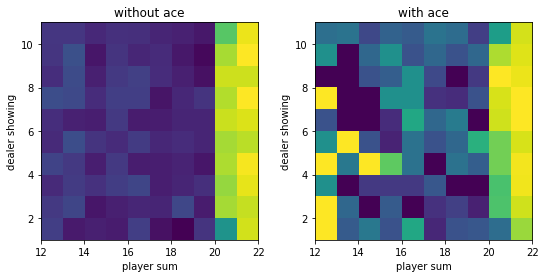

In [13]:
plot(v)

In [22]:
def monte_carlo_with_exploring_start(env,episode_num=50000):
    policy=np.zeros((22,11,2,2))
    policy[:,:,:,1]=1.
    q=np.zeros_like(policy)
    c=np.zeros_like(policy)
    for _ in range(episode_num):
        state=(np.random.randint(12,22),np.random.randint(1,11),np.random.randint(2))
        action=np.random.randint(2)
        env.reset()
        if state[2]:
            env.player=[1,state[0]-11]
        else:
            if state[0]==21:
                env.player=[10,9,2]
            else:
                env.player=[10,state[0]-10]
        env.dealer[0]=state[1]
        state_actions=[]
        while True:
            state_actions.append((state,action))
            observation,reward,done,_=env.step(action)
            if done:
                break
            state=ob2state(observation)
            action=np.random.choice(env.action_space.n,p=policy[state])
        g=reward
        for state,action in state_actions:
            c[state][action]+=1.
            q[state][action]+=(g-q[state][action])/c[state][action]
            a=q[state].argmax()
            policy[state]=0.
            policy[state][a]=1.
    return policy,q

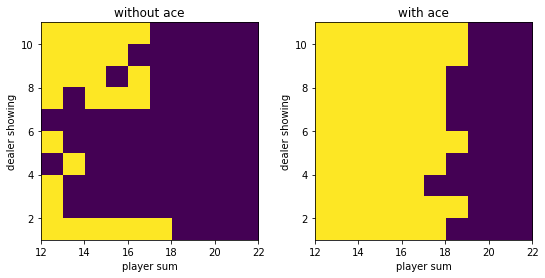

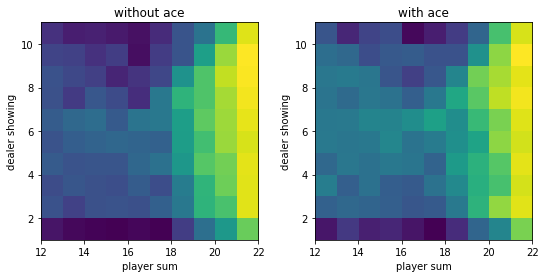

In [23]:
policy, q = monte_carlo_with_exploring_start(env)
v = q.max(axis=-1)
plot(policy.argmax(-1))
plot(v)

In [20]:
def monte_carlo_with_soft(env, episode_num=500000, epsilon=0.1):
    policy = np.ones((22, 11, 2, 2)) * 0.5 
    q = np.zeros_like(policy)
    c = np.zeros_like(policy)
    for _ in range(episode_num):
        state_actions = []
        observation = env.reset()
        while True:
            state = ob2state(observation)
            action = np.random.choice(env.action_space.n, p=policy[state])
            state_actions.append((state, action))
            observation, reward, done, _ = env.step(action)
            if done:
                break 
        g = reward 
        for state, action in state_actions:
            c[state][action] += 1.
            q[state][action] += (g - q[state][action]) / c[state][action]
            a = q[state].argmax()
            policy[state] = epsilon / 2.
            policy[state][a] += (1. - epsilon)
    return policy, q

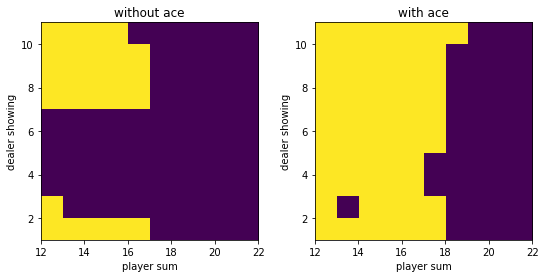

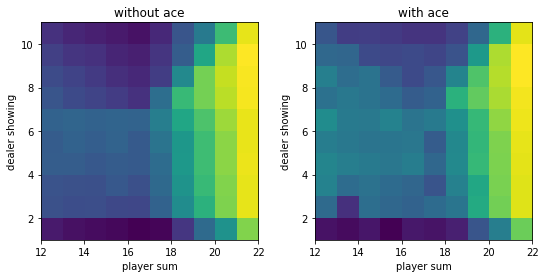

In [21]:
policy, q = monte_carlo_with_soft(env)
v = q.max(axis=-1)
plot(policy.argmax(-1))
plot(v)

In [24]:
def evaluate_monte_carlo_importance_resample(env,policy,behavior_policy,episode_num=5000):
    q=np.zeros_like(policy)
    c=np.zeros_like(policy)
    for _ in range(episode_num):
        state_actions=[]
        observation=env.reset()
        while True:
            state=ob2state(observation)
            action=np.random.choice(env.action_space.n,p=behavior_policy[state])
            state_actions.append((state,action))
            observation,reward,done,_=env.step(action)
            if done:
                break
        g=reward
        rho=1.
        for state,action in reversed(state_actions):
            c[state][action]+=rho
            q[state][action]+=(rho/c[state][action]*(g-q[state][action]))
            rho*=(policy[state][action]/behavior_policy[state][action])
            if rho==0:
                break
    return q

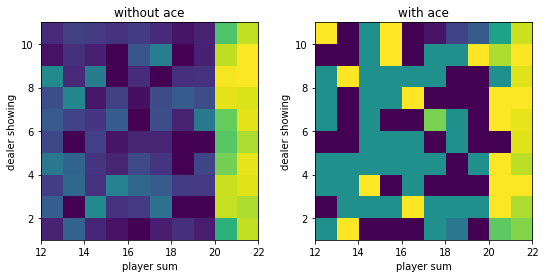

In [25]:
policy=np.zeros((22,11,2,2))
policy[20:,:,:,0]=1
policy[:20,:,:,1]=1
behavior_policy=np.ones_like(policy)*0.5
q=evaluate_monte_carlo_importance_resample(env,policy,behavior_policy)
v=(q*policy).sum(axis=-1)
plot(v)

In [26]:
def monte_carlo_importance_resample(env, episode_num=500000):
    policy = np.zeros((22, 11, 2, 2))
    policy[:, :, :, 0] = 1.
    behavior_policy = np.ones_like(policy) * 0.5
    q = np.zeros_like(policy)
    c = np.zeros_like(policy)
    for _ in range(episode_num):
        state_actions = []
        observation = env.reset()
        while True:
            state = ob2state(observation)
            action = np.random.choice(env.action_space.n,p=behavior_policy[state])
            state_actions.append((state, action))
            observation, reward, done, _ = env.step(action)
            if done:
                break 
        g = reward 
        rho = 1. 
        for state, action in reversed(state_actions):
            c[state][action] += rho
            q[state][action] += (rho / c[state][action] * (g - q[state][action]))
            a = q[state].argmax()
            policy[state] = 0.
            policy[state][a] = 1.
            if a != action:
                break
            rho /= behavior_policy[state][action]
    return policy, q

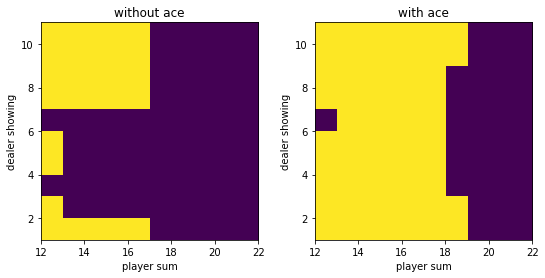

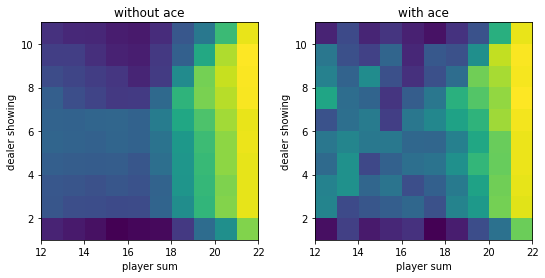

In [27]:
policy, q = monte_carlo_importance_resample(env)
v = q.max(axis=-1)
plot(policy.argmax(-1))
plot(v)

### 时序差分价值迭代

In [28]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import gym

In [29]:
env = gym.make('Taxi-v2')
env.seed(0)
print('观察空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('状态数量 = {}'.format(env.observation_space.n))
print('动作数量 = {}'.format(env.action_space.n))

观察空间 = Discrete(500)
动作空间 = Discrete(6)
状态数量 = 500
动作数量 = 6


In [30]:
state=env.reset()
taxirow,taxicol,passloc,destidx=env.unwrapped.decode(state)
print(taxirow,taxicol,passloc,destidx)
print('的士位置={}'.format((taxirow,taxicol)))
print('乘客位置={}'.format(env.unwrapped.locs[passloc]))
print('目标位置={}'.format(env.unwrapped.locs[destidx]))
env.render()

0 1 1 2
的士位置=(0, 1)
乘客位置=(0, 4)
目标位置=(4, 0)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [33]:
env.step(0)

(126, -1, False, {'prob': 1.0})

In [34]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


In [35]:
class SARSAAgent:
    def __init__(self,env,gamma=0.9,learning_rate=0.1,epsilon=.01):
        self.gamma=gamma
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.action_n=env.action_space.n
        self.q=np.zeros((env.observation_space.n,env.action_space.n))
    
    def decide(self,state):
        if np.random.uniform()>self.epsilon:
            action=self.q[state].argmax()
        else:
            action=np.random.randint(self.action_n)
        return action
    
    def learn(self,state,action,reward,next_state,done,next_action):
        u=reward+self.gamma*self.q[next_state,next_action]*(1.-done)
        td_error=u-self.q[state,action]
        self.q[state,action]+=self.learning_rate*td_error

In [37]:
def play_sarsa(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    action=agent.decide(observation)
    while True:
        if render:
            env.render()
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        next_action=agent.decide(next_observation)
        if train:
            agent.learn(observation,action,reward,next_observation,done,next_action)
        if done:
            break
        observation,action=next_observation,next_action
    return episode_reward

平均回合奖励 = 866 / 100 = 8.66


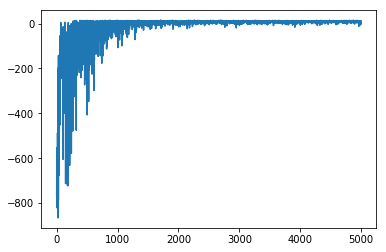

In [38]:
agent=SARSAAgent(env)

episodes=5000
episode_rewards=[]
for episode in range(episodes):
    episode_reward=play_sarsa(env,agent,train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

agent.epsilon=0.
episode_rewards = [play_sarsa(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),len(episode_rewards), np.mean(episode_rewards)))

In [39]:
pd.DataFrame(agent.q)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-2.646310,-2.522631,-2.516217,-1.388479,4.062834,-3.773033
2,-2.098749,-1.294820,-1.933234,-1.303056,7.293310,-3.772892
3,-2.934908,-2.929049,-2.870715,-2.521973,2.194945,-3.396430
4,-3.559915,-4.356514,-4.345907,-4.412836,-5.596085,-5.517758
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-5.312338,-5.376064,-5.372342,-5.413750,-5.593334,-5.602908
7,-4.041623,-4.088066,-3.662406,-4.023481,-5.594706,-4.747250
8,0.100660,-3.772623,-3.818362,-3.807797,-3.764710,-3.772784
9,-4.208700,-5.197768,-5.194723,-5.214197,-5.593682,-5.604276


In [40]:
policy=np.eye(agent.action_n)[agent.q.argmax(axis=-1)]
pd.DataFrame(policy)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
class ExpectedSARSAAgent:
    def __init__(self,env,gamma=0.9,learning_rate=0.1,epsilon=.01):
        self.gamma=gamma
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.q=np.zeros((env.observation_space.n,env.action_space.n))
        self.action_n=env.action_space.n
        
    def decide(self,state):
        if np.random.uniform()>self.epsilon:
            action=self.q[state].argmax()
        else:
            action=np.random.randint(self.action_n)
        return action
    
    def learn(self,state,action,reward,next_state,done):
        v=(self.q[next_state].sum()*self.epsilon+self.q[next_state].max()*(1-self.epsilon))
        u=reward+self.gamma*v*(1-done)
        td_error=u-self.q[state,action]
        self.q[state,action]+=self.learning_rate*td_error

In [42]:
def play_qlearning(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,next_observation,done)
        if done:
            break
        observation=next_observation
    return episode_reward

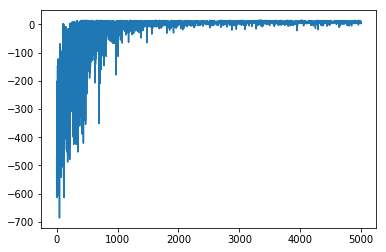

In [43]:
agent=ExpectedSARSAAgent(env)

episodes=5000
episode_rewards=[]
for episode in range(episodes):
    episode_reward=play_qlearning(env,agent,train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

In [44]:
class QLearningAgent:
    def __init__(self,env,gamma=0.9,learning_rate=0.1,epsilon=.01):
        self.gamma=gamma
        self.learning_rate=learning_rate
        self.epsilon=epsilon
        self.action_n=env.action_space.n
        self.q=np.zeros((env.observation_space.n,env.action_space.n))
        
    def decide(self,state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action 
    
    def learn(self,state,action,reward,next_state,done):
        u=reward+self.gamma*self.q[next_state].max()*(1-done)
        td_error=u-self.q[state,action]
        self.q[state,action]+=self.learning_rate*td_error

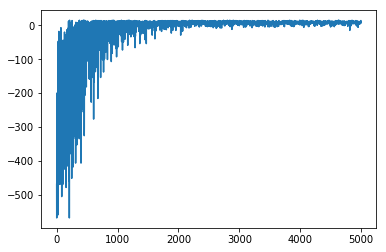

In [45]:
agent = QLearningAgent(env)
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

In [46]:
class DoubleQLearningAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=.01):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q0 = np.zeros((env.observation_space.n, env.action_space.n))
        self.q1 = np.zeros((env.observation_space.n, env.action_space.n))
        
    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = (self.q0 + self.q1)[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action
    
    def learn(self, state, action, reward, next_state, done):
        if np.random.randint(2):
            self.q0, self.q1 = self.q1, self.q0
        a = self.q0[next_state].argmax()
        u = reward + self.gamma * self.q1[next_state, a] * (1. - done)
        td_error = u - self.q0[state, action]
        self.q0[state, action] += self.learning_rate * td_error

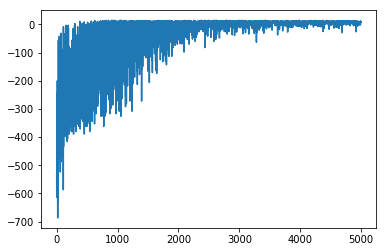

In [48]:
agent=DoubleQLearningAgent(env)

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

In [53]:
class SARSALambdaAgent(SARSAAgent):
    def __init__(self,env,lambd=0.9,beta=1.,gamma=0.9,learning_rate=0.1,epsilon=.01):
        super().__init__(env,gamma=gamma,learning_rate=learning_rate,epsilon=epsilon)
        self.lambd=lambd
        self.beta=beta
        self.e=np.zeros((env.observation_space.n,env.action_space.n))
        
    def learn(self,state,action,reward,next_state,done,next_action):
        self.e*=(self.lambd*self.gamma)
        self.e[state,action]=1.+self.beta*self.e[state,action]
        
        u=reward+self.gamma*self.q[next_state,next_action]*(1-done)
        td_error=u-self.q[state,action]
        self.q[state,action]+=self.learning_rate*self.e[state,action]*td_error

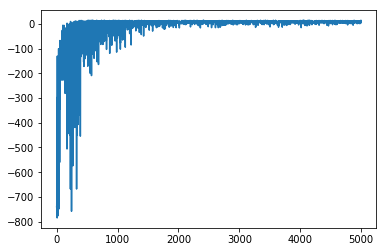

In [54]:
agent=SARSALambdaAgent(env)

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_sarsa(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

### 函数近似方法

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import gym
import tensorflow.compat.v2 as tf
tf.random.set_seed(0)
from tensorflow import keras

In [4]:
env=gym.make('MountainCar-v0')
env.seed(0)
print('观测空间={}'.format(env.observation_space))
print('动作空间={}'.format(env.action_space))
print('位置范围={}'.format((env.unwrapped.min_position,env.unwrapped.max_position)))
print('速度范围={}'.format((-env.unwrapped.max_speed,env.unwrapped.max_speed)))
print('目标位置={}'.format(env.unwrapped.goal_position))

观测空间=Box(2,)
动作空间=Discrete(3)
位置范围=(-1.2, 0.6)
速度范围=(-0.07, 0.07)
目标位置=0.5


失败退出


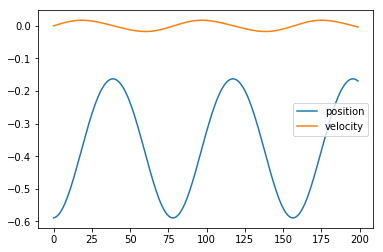

In [5]:
positions,velocities=[],[]
observation=env.reset()
while True:
    positions.append(observation[0])
    velocities.append(observation[1])
    next_observation,reward,done,_=env.step(2)
    if done:
        break
    observation=next_observation
    
if next_observation[0]>0.5:
    print('成功到达')
else:
    print('失败退出')
    
fig,ax=plt.subplots()
ax.plot(positions,label='position')
ax.plot(velocities,label='velocity')
ax.legend()

In [18]:
class DQNReplayer:
    def __init__(self,capacity):
        self.memory=pd.DataFrame(index=range(capacity),columns=['observation','action','reward','next_observation','done'])
        self.i=0
        self.count=0
        self.capacity=capacity
        
    def store(self,*args):
        self.memory.loc[self.i]=args
        self.i=(self.i+1)%self.capacity
        self.count=min(self.count+1,self.capacity)
        
    def sample(self,size):
        indices=np.random.choice(self.count,size=size)
        return (np.stack(self.memory.loc[indices,field]) for field in self.memory.columns)

In [22]:
class DQNAgent:
    def __init__(self,env,net_kwargs={},gamma=0.99,epsilon=.001,replayer_capacity=10000,batch_size=64):
        observation_dim=env.observation_space.shape[0]
        self.action_n=env.action_space.n
        self.gamma=gamma
        self.epsilon=epsilon
        
        self.batch_size=batch_size
        self.replayer=DQNReplayer(replayer_capacity)
        
        self.evaluate_net=self.build_network(input_size=observation_dim,output_size=self.action_n,**net_kwargs)
        self.target_net=self.build_network(input_size=observation_dim,output_size=self.action_n,**net_kwargs)
        
        self.target_net.set_weights(self.evaluate_net.get_weights())
        
    def build_network(self,input_size,hidden_sizes,output_size,activation=tf.nn.relu,output_activation=None,learning_rate=0.01):
        model=keras.Sequential()
        for layer,hidden_size in enumerate(hidden_sizes):
            kwargs=dict(input_shape=(input_size,)) if not layer else {}
            model.add(keras.layers.Dense(units=hidden_size,activation=activation,**kwargs))
        model.add(keras.layers.Dense(units=output_size,activation=output_activation))
        optimizer=tf.optimizers.Adam(lr=learning_rate)
        model.compile(loss='mse',optimizer=optimizer)
        return model
    
    def learn(self,observation,action,reward,next_observation,done):
        self.replayer.store(observation,action,reward,next_observation,done)
        
        observations,actions,rewards,next_observations,dones=self.replayer.sample(self.batch_size)
        
        next_qs=self.target_net.predict(next_observations)
        next_max_qs=next_qs.max(axis=-1)
        us=rewards+self.gamma*(1-dones)*next_max_qs
        targets=self.evaluate_net.predict(observations)
        targets[np.arange(us.shape[0]),actions]=us
        self.evaluate_net.fit(observations,targets,verbose=0)
        
        if done:
            self.target_net.set_weights(self.evaluate_net.get_weights())
            
    def decide(self,observation):
        if np.random.rand()<self.epsilon:
            return np.random.randint(self.action_n)
        qs=self.evaluate_net.predict(observation[np.newaxis])
        return np.argmax(qs)    
    
    

In [23]:
def play_qlearning(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,next_observation,done)
        if done:
            break
        observation=next_observation
    return episode_reward

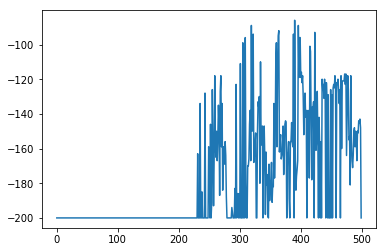

In [24]:
net_kwargs = {'hidden_sizes' : [16,], 'learning_rate' : 0.01}
agent = DQNAgent(env, net_kwargs=net_kwargs)

episodes = 500
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [27]:
class DoubleDQNAgent(DQNAgent):
    def learn(self,observation,action,reward,next_observation,done):
        self.replayer.store(observation,action,reward,next_observation,done)
        observations,actions,rewards,next_observations,dones=self.replayer.sample(self.batch_size)
        next_eval_qs=self.evaluate_net.predict(next_observations)
        next_actions=next_eval_qs.argmax(axis=-1)
        next_qs=self.target_net.predict(next_observations)
        next_max_qs=next_qs[np.arange(next_qs.shape[0]),next_actions]
        us=rewards+self.gamma*next_max_qs*(1-dones)
        targets=self.evaluate_net.predict(observations)
        targets[np.arange(us.shape[0]),actions]=us
        self.evaluate_net.fit(observations,targets,verbose=0)
        
        if done:
            self.target_net.set_weights(self.evaluate_net.get_weights())

In [30]:
net_kwargs = {'hidden_sizes' : [16,], 'learning_rate' : 0.004}
agent = DoubleDQNAgent(env, net_kwargs=net_kwargs)

episodes = 200
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True,render=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

### 回合更新策略梯度法

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import gym
import tensorflow.compat.v2 as tf
tf.random.set_seed(0)
from tensorflow import keras

In [3]:
env=gym.make('CartPole-v0')
env.seed(0)

[0]

In [14]:
class VPGAgent:
    def __init__(self,env,policy_kwargs,baseline_kwargs=None,gamma=0.99):
        self.action_n=env.action_space.n
        self.gamma=gamma
        
        self.trajectory=[]
        
        self.policy_net=self.build_network(output_size=self.action_n,output_activation=tf.nn.softmax,loss=tf.losses.categorical_crossentropy,**policy_kwargs)
        
        if baseline_kwargs:
            self.baseline_net=self.build_network(output_size=1,**baseline_kwargs)
        
    def build_network(self,hidden_sizes,output_size,activation=tf.nn.relu,output_activation=None,loss=tf.losses.mse,learning_rate=0.01):
        model=keras.Sequential()
        for hidden_size in hidden_sizes:
            model.add(keras.layers.Dense(units=hidden_size,activation=activation))
        model.add(keras.layers.Dense(units=output_size,activation=output_activation))
        optimizer=tf.optimizers.Adam(learning_rate)
        model.compile(optimizer=optimizer,loss=loss)
        return model
    
    def decide(self,observation):
        probs=self.policy_net.predict(observation[np.newaxis])[0]
        action=np.random.choice(self.action_n,p=probs)
        return action
    
    def learn(self,observation,action,reward,done):
        self.trajectory.append((observation,action,reward))
        
        if done:
            df=pd.DataFrame(self.trajectory,columns=['observation','action','reward'])
            df['discount']=self.gamma**df.index.to_series()
            df['discount_reward']=df['discount']*df['reward']
            df['discount_return']=df['discount_reward'][::-1].cumsum()
            df['psi']=df['discount_return']
            
            x=np.stack(df['observation'])
            if hasattr(self,'baseline_net'):
                df['baseline']=self.baseline_net.predict(x)
                df['psi']-=(df['baseline']*df['discount'])
                df['return']=df['discount_return']/df['discount']
                y=df['return'].values[:,np.newaxis]
                self.baseline_net.fit(x,y,verbose=0)
                
            y=np.eye(self.action_n)[df['action']]*df['psi'].values[:,np.newaxis]
            self.policy_net.fit(x,y,verbose=0)
            
            self.trajectory=[]

In [15]:
def play_montecarlo(env,agent,render=False,train=False):
    observation=env.reset()
    episode_reward=0
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,done)
        if done:
            break
        observation=next_observation
    return episode_reward

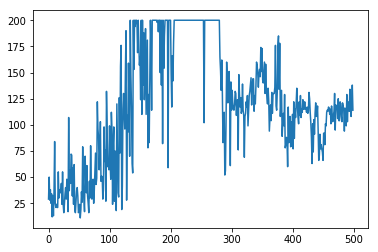

In [16]:
policy_kwargs = {'hidden_sizes' : [10,], 'activation' : tf.nn.relu,'learning_rate' : 0.008}
agent = VPGAgent(env, policy_kwargs=policy_kwargs)
episodes=500
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_montecarlo(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

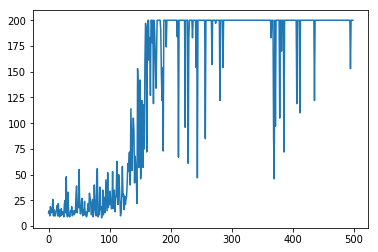

In [17]:
policy_kwargs = {'hidden_sizes' : [10,], 'activation':tf.nn.relu,  'learning_rate':0.008}
baseline_kwargs = {'hidden_sizes' : [10,], 'activation':tf.nn.relu, 'learning_rate':0.008}
agent = VPGAgent(env, policy_kwargs=policy_kwargs,baseline_kwargs=baseline_kwargs)

episodes = 500
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_montecarlo(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [22]:
class RandomAgent:
    def __init__(self,env):
        self.action_n=env.action_space.n
        
    def decide(self,observation):
        action=np.random.choice(self.action_n)
        behavior=1./self.action_n
        return action,behavior
    
class OffPolicyVPGAgent(VPGAgent):
    def __init__(self,env,policy_kwargs,baseline_kwargs=None,gamma=0.99):
        self.action_n=env.action_space.n
        self.gamma=gamma
        
        self.trajectory=[]
        def dot(y_true,y_pred):
            return -tf.reduce_sum(y_true*y_pred,axis=-1)
        
        self.policy_net=self.build_network(output_size=self.action_n,output_activation=tf.nn.softmax,loss=dot,**policy_kwargs)
        if baseline_kwargs:
            self.baseline_net=self.build_network(output_size=1,**baseline_kwargs)
            
    def learn(self,observation,action,behavior,reward,done):
        self.trajectory.append((observation,action,behavior,reward))
        
        if done:
            df=pd.DataFrame(self.trajectory,columns=['observation','action','behavior','reward'])
            df['discount']=self.gamma**df.index.to_series()
            df['discounted_reward']=df['discount']*df['reward']
            df['discounted_return']=df['discounted_reward'][::-1].cumsum()
            df['psi']=df['discounted_return']
            
            x=np.stack(df['observation'])
            if hasattr(self,'baseline_net'):
                df['baseline']=self.baseline_net.predict(x)
                df['psi'] -= df['baseline'] * df['discount']
                df['return'] = df['discounted_return'] / df['discount']
                y = df['return'].values[:, np.newaxis]
                self.baseline_net.fit(x, y, verbose=0)
                
            y=np.eye(self.action_n)[df['action']]*(df['psi']/df['behavior']).values[:,np.newaxis]
            self.policy_net.fit(x,y,verbose=0)
            
            self.trajectory=[]

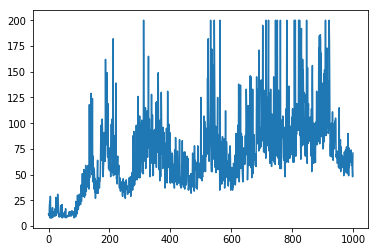

In [23]:
policy_kwargs = {'hidden_sizes' : [10,], 'activation':tf.nn.relu, 'learning_rate':0.02}
agent = OffPolicyVPGAgent(env, policy_kwargs=policy_kwargs)
behavior_agent = RandomAgent(env)

episodes=1000
episode_rewards=[]
for episode in range(episodes):
    observation=env.reset()
    episode_reward=0.
    while True:
        action,behavior=behavior_agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        agent.learn(observation,action,behavior,reward,done)
        if done:
            break
        observation=next_observation
        
    episode_reward = play_montecarlo(env, agent, train=False)
    episode_rewards.append(episode_reward)
        
plt.plot(episode_rewards)   

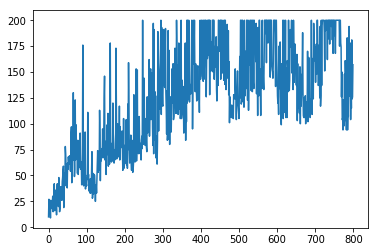

In [25]:
policy_kwargs = {'hidden_sizes' : [10,], 'activation':tf.nn.relu, 'learning_rate':0.02}
baseline_kwargs = {'hidden_sizes' : [10,], 'activation':tf.nn.relu,'learning_rate':0.03}
agent = OffPolicyVPGAgent(env, policy_kwargs=policy_kwargs,baseline_kwargs=baseline_kwargs)
behavior_agent = RandomAgent(env)

episodes = 800
episode_rewards = []
for episode in range(episodes):
    observation = env.reset()
    episode_reward = 0.
    while True:
        env.render()
        action, behavior = behavior_agent.decide(observation)
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        agent.learn(observation, action, behavior, reward, done)
        if done:
            break
        observation = next_observation
    
    episode_reward = play_montecarlo(env, agent, train=False)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)
env.close()

### 演员/评论家

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import gym
import tensorflow.compat.v2 as tf
tf.random.set_seed(0)
from tensorflow import keras

In [2]:
env=gym.make('Acrobot-v1')
env.seed(0)

[0]

In [3]:
class QActorCriticAgent:
    def __init__(self,env,actor_kwargs,critic_kwargs,gamma=0.99):
        self.action_n=env.action_space.n
        self.gamma=gamma
        self.discount=1
        
        self.actor_net=self.build_network(output_size=self.action_n,output_activation=tf.nn.softmax,loss=tf.losses.categorical_crossentropy,**actor_kwargs)
        self.critic_net=self.build_network(output_size=self.action_n,**critic_kwargs)
        
    def build_network(self,hidden_sizes,output_size,input_size=None,activation=tf.nn.relu,output_activation=None,loss=tf.losses.mse,learning_rate=0.01):
        model=keras.Sequential()
        for idx,hidden_size in enumerate(hidden_sizes):
            kwargs={}
            if idx==0 and input_size is not None:
                kwargs['input_shape']=(input_size,)
            model.add(keras.layers.Dense(units=hidden_size,activation=activation,**kwargs))
        model.add(keras.layers.Dense(units=output_size,activation=output_activation))
        optimizer=tf.optimizers.Adam(learning_rate)
        model.compile(optimizer=optimizer,loss=loss)
        return model
    
    def decide(self,observation):
        probs=self.actor_net.predict(observation[np.newaxis])[0]
        action=np.random.choice(self.action_n,p=probs)
        return action
    
    def learn(self,observation,action,reward,next_observation,done):
        x=observation[np.newaxis]
        u=self.critic_net.predict(x)
        q=u[0,action]
        x_tensor=tf.convert_to_tensor(x,dtype=tf.float32)
        with tf.GradientTape() as tape:
            pi_tensor=self.actor_net(x_tensor)[0,action]
            logpi_tensor=tf.math.log(tf.clip_by_value(pi_tensor,1e-6,1.))
            loss_tensor=-self.discount*q*logpi_tensor
        grad_tensors=tape.gradient(loss_tensor,self.actor_net.variables)
        self.actor_net.optimizer.apply_gradients(zip(grad_tensors,self.actor_net.variables))
        
        q=self.critic_net.predict(next_observation[np.newaxis])[0,action]
        u[0,action]=reward+(1-done)*self.gamma*q
        self.critic_net.fit(x,u,verbose=0)
        
        if done:
            self.discount=1
        else:
            self.discount+=self.gamma

In [4]:
def play_qlearning(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    step=0
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,next_observation,done)
        if done:
            break
        step+=1
        observation=next_observation
    return episode_reward

W0911 12:57:25.738471 140473293002496 deprecation.py:323] From /home/gengdd/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


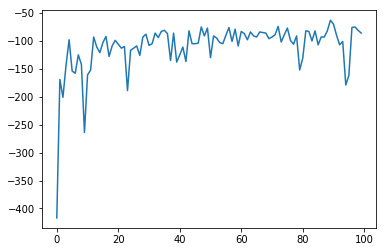

In [5]:
actor_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.0005}
critic_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.0005}
agent = QActorCriticAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs)

episodes = 100
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [6]:
class AdvantageActorCriticAgent(QActorCriticAgent):
    def __init__(self,env,actor_kwargs,critic_kwargs,gamma=0.99):
        self.action_n=env.action_space.n
        self.gamma=gamma
        self.discount=1.
        
        self.actor_net=self.build_network(output_size=self.action_n,output_activation=tf.nn.softmax,loss=tf.losses.categorical_crossentropy,**actor_kwargs)
        self.critic_net=self.build_network(output_size=1,**critic_kwargs)
        
    def learn(self,observation,action,reward,next_observation,done):
        x=observation[np.newaxis]
        u=reward+(1-done)*self.gamma*self.critic_net.predict(next_observation[np.newaxis])
        td_error=u-self.critic_net.predict(x)
        y=self.discount*td_error*np.eye(self.action_n)[np.newaxis,action]
        self.actor_net.fit(x,y,verbose=0)
        self.critic_net.fit(x,u,verbose=0)
        
        if done:
            self.discount=1.
        else:
            self.discount*=self.gamma

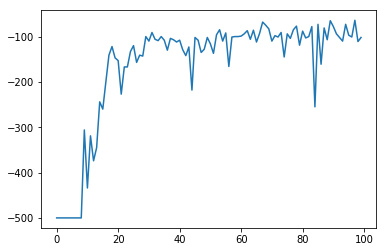

In [7]:
actor_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.0001}
critic_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.0002}
agent = AdvantageActorCriticAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs)

episodes = 100
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [8]:
class ElibilityTraceActorCriticAgent(QActorCriticAgent):
    def __init__(self,env,actor_kwargs,critic_kwargs,gamma=0.99,actor_lambda=0.9,critic_lambda=0.9):
        observation_dim=env.observation_space.shape[0]
        self.action_n=env.action_space.n
        self.actor_lambda=actor_lambda
        self.critic_lambda=critic_lambda
        self.gamma=gamma
        self.discount=1.
        
        self.actor_net=self.build_network(input_size=observation_dim,output_size=self.action_n,output_activation=tf.nn.softmax,**actor_kwargs)
        self.critic_net=self.build_network(input_size=observation_dim,output_size=1,**critic_kwargs)
        self.actor_traces=[np.zeros_like(weight) for weight in self.actor_net.get_weights()]
        self.critic_traces=[np.zeros_like(weight) for weight in self.critic_net.get_weights()]
        
    def learn(self,observation,action,reward,next_observation,done):
        q=self.critic_net.predict(observation[np.newaxis])[0,0]
        u=reward+(1-done)*self.gamma*self.critic_net.predict(next_observation[np.newaxis])[0,0]
        td_error=u-q
        
        x_tensor=tf.convert_to_tensor(observation[np.newaxis],dtype=tf.float32)
        with tf.GradientTape() as tape:
            pi_tensor=self.actor_net(x_tensor)
            logpi_tensor=tf.math.log(tf.clip_by_value(pi_tensor,1e-6,1.))
            logpi_pick_tensor=logpi_tensor[0,action]
            
        grad_tensors=tape.gradient(logpi_pick_tensor,self.actor_net.variables)
        self.actor_traces=[self.gamma*self.actor_lambda*trace+self.discount*grad.numpy() for trace,grad in zip(self.actor_traces,grad_tensors)]
        actor_grads=[tf.convert_to_tensor(-td_error*trace,dtype=tf.float32) for trace in self.actor_traces]
        actor_grads_and_vars=tuple(zip(actor_grads,self.actor_net.variables))
        self.actor_net.optimizer.apply_gradients(actor_grads_and_vars)
        
        with tf.GradientTape() as tape:
            v_tensor=self.critic_net(x_tensor)
        grad_tensor=tape.gradient(v_tensor,self.critic_net.variables)
        self.critic_traces=[self.gamma*self.critic_lambda*trace+self.discount*grad.numpy() for trace,grad in zip(self.critic_traces,grad_tensor)]
        critic_grads=[tf.convert_to_tensor(-td_error*trace,dtype=tf.float32) for trace in self.critic_traces]
        critic_grads_and_vars=tuple(zip(critic_grads,self.critic_net.variables))
        self.critic_net.optimizer.apply_gradients(critic_grads_and_vars)
        
        if done:
            self.actor_traces = [np.zeros_like(weight) for weight in self.actor_net.get_weights()]
            self.critic_traces = [np.zeros_like(weight) for weight in self.critic_net.get_weights()]
            self.discount=1.
        else:
            self.discount*=self.gamma

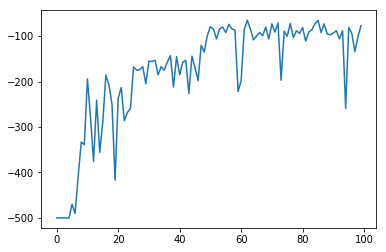

In [9]:
actor_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.001}
critic_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.001}
agent = ElibilityTraceActorCriticAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs)

episodes = 100
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True,render=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()

In [10]:
class PPOReplayer:
    def __init__(self):
        self.memory=pd.DataFrame()
    def store(self,df):
        self.memory=pd.concat([self.memory,df],ignore_index=True)
    def sample(self,size):
        indices=np.random.choice(self.memory.shape[0],size=size)
        return (np.stack(self.memory.loc[indices,field]) for field in self.memory.columns)

In [11]:
class PPOAgent(QActorCriticAgent):
    def __init__(self,env,actor_kwargs,critic_kwargs,clip_ratio=1.0,gamma=0.99,lambd=0.99,min_trajectory_length=1000,batches=1,batch_size=64):
        self.action_n=env.action_space.n
        self.gamma=gamma
        self.lambd=lb=lambd
        self.clip_ratio=clip_ratio
        self.min_trajectory_length=min_trajectory_length
        self.batches=batches
        self.batch_size=batch_size
        
        self.trajectory=[]
        self.replayer=PPOReplayer()
        
        self.actor_net=self.build_network(output_size=self.action_n,output_activation=tf.nn.softmax,**actor_kwargs)
        self.critic_net=self.build_network(output_size=1,**critic_kwargs)
        
    def learn(self,observation,action,reward,done):
        self.trajectory.append((observation,action,reward))
        
        if done:
            df=pd.DataFrame(self.trajectory,columns=['observation','action','reward'])
            observations=np.stack(df['observation'])
            df['v']=self.critic_net.predict(observations)
            pis=self.actor_net.predict(observations)
            df['pi']=[pi[action] for pi,action in zip(pis,df['action'])]
            
            df['next_v']=df['v'].shift(-1).fillna(0.)
            df['u']=df['reward']+self.gamma*df['next_v']
            df['delta']=df['u']-df['v']
            df['return']=df['reward']
            df['advantage']=df['delta']
            for i in df.index[-2::-1]:
                df.loc[i,'return']+=self.gamma*df.loc[i+1,'return']
                df.loc[i,'advantage']+=self.gamma*self.lambd*df.loc[i+1,'advantage']
            fields=['observation','action','pi','advantage','return']
            self.replayer.store(df[fields])
            self.trajectory=[]
            
            if len(self.replayer.memory)>self.min_trajectory_length:
                for batch in range(self.batches):
                    observations,actions,pis,advantages,returns=self.replayer.sample(size=self.batch_size)
                    
                    s_tensor=tf.convert_to_tensor(observations,dtype=tf.float32)
                    gather_tensor=tf.convert_to_tensor([(i,a) for i,a in enumerate(actions)],dtype=tf.int32)
                    pi_old_tensor=tf.convert_to_tensor(pis,dtype=tf.float32)
                    advantage_tensor=tf.convert_to_tensor(advantages,dtype=tf.float32)
                    
                    with tf.GradientTape() as tape:
                        all_pi_tensor=self.actor_net(s_tensor)
                        pi_tensor=tf.gather_nd(all_pi_tensor,gather_tensor)
                        surrogate_advantage_tensor=(pi_tensor/pi_old_tensor)*advantage_tensor
                        clip_times_advantage_tensor=self.clip_ratio*surrogate_advantage_tensor
                        max_surrogate_advantage_tensor=advantage_tensor+tf.where(advantage_tensor>0.,clip_times_advantage_tensor,-clip_times_advantage_tensor)
                        clipped_surrogate_advantage_tensor=tf.minimum(surrogate_advantage_tensor,max_surrogate_advantage_tensor)
                        loss_tensor=-tf.reduce_mean(clipped_surrogate_advantage_tensor)
                    actor_grads=tape.gradient(loss_tensor,self.actor_net.variables)
                    self.actor_net.optimizer.apply_gradients(zip(actor_grads,self.actor_net.variables))
                    
                    self.critic_net.fit(observations,returns,verbose=0)
                    
                self.replayer=PPOReplayer()

In [12]:
def play_montecarlo(env,agent,render=False,train=False):
    observation=env.reset()
    episode_reward=0.
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,done)
        if done:
            break
        observation=next_observation
    return episode_reward

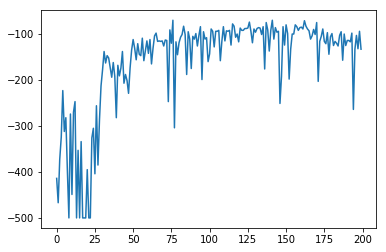

In [14]:
actor_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.001}
critic_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.002}
agent = PPOAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs, batches=50)

episodes = 200
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_montecarlo(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [18]:
class OffPACAgent:
    def __init__(self,env,actor_kwargs,critic_kwargs,gamma=0.99):
        self.action_n=env.action_space.n
        self.gamma=gamma
        self.discount=1.
        self.critic_learning_rate=critic_kwargs['learning_rate']
        
        self.actor_net=self.build_network(output_size=self.action_n,output_activation=tf.nn.softmax,**actor_kwargs)
        self.critic_net=self.build_network(output_size=self.action_n,**critic_kwargs)
        
    def build_network(self,hidden_sizes,output_size,activation=tf.nn.relu,output_activation=None,loss=tf.losses.mse,learning_rate=0.01):
        model=keras.Sequential()
        for idx,hidden_size in enumerate(hidden_sizes):
            model.add(keras.layers.Dense(units=hidden_size,activation=activation))
        model.add(keras.layers.Dense(units=output_size,activation=output_activation))
        optimizer=tf.optimizers.SGD(learning_rate)
        model.compile(optimizer=optimizer,loss=loss)
        return model
    
    def decide(self,observation):
        probs=self.actor_net.predict(observation[np.newaxis])[0]
        action=np.random.choice(self.action_n,p=probs)
        return action
    
    def learn(self,observation,action,behavior,reward,next_observation,done):
        observations=np.float32(observation[np.newaxis])
        pi=self.actor_net(observations)[0,action]
        q=self.critic_net(observations)[0,action]
        
        x_tensor=tf.convert_to_tensor(observations,dtype=tf.float32)
        with tf.GradientTape() as tape:
            pi_tensor=self.actor_net(x_tensor)
            loss_tensor=-self.discount*q/behavior*pi_tensor[0,action]
        grad_tensors=tape.gradient(loss_tensor,self.actor_net.variables)
        self.actor_net.optimizer.apply_gradients(zip(grad_tensors,self.actor_net.variables))
        
        next_q=self.critic_net.predict(next_observation[np.newaxis])[0,action]
        u=reward+self.gamma*(1-done)*next_q
        u_tensor=tf.convert_to_tensor(u,dtype=tf.float32)
        with tf.GradientTape() as tape:
            q_tensor=self.critic_net(x_tensor)
            mse_tensor=tf.losses.MSE(u_tensor,q_tensor)
            loss_tensor=pi/behavior*mse_tensor
        grad_tensors=tape.gradient(loss_tensor,self.critic_net.variables)
        self.critic_net.optimizer.apply_gradients(zip(grad_tensors,self.critic_net.variables))
        
        if done:
            self.discount=1.
        else:
            self.discount*=self.gamma

In [19]:
class RandomAgent:
    def __init__(self,env):
        self.action_n=env.action_space.n
    
    def decide(self,observation):
        action=np.random.choice(self.action_n)
        behavior=1./self.action_n
        return action,behavior

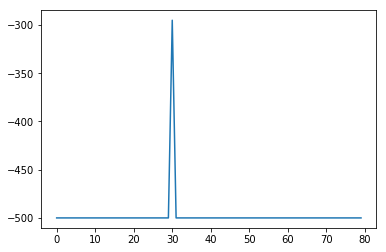

In [20]:
actor_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.0005}
critic_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.0005}
agent = OffPACAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs)
behavior_agent = RandomAgent(env)

episodes=80
episode_rewards=[]
for episode in range(episodes):
    observation=env.reset()
    episode_reward=0.
    while True:
        action,behavior=behavior_agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        agent.learn(observation,action,behavior,reward,next_observation,done)
        if done:
            break
        observation=next_observation
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [21]:
class DQNReplayer:
    def __init__(self,capacity):
        self.memory=pd.DataFrame(index=range(capacity),columns=['observation','action','reward','next_observation','done'])
        self.i=0
        self.count=0
        self.capacity=capacity
        
    def store(self,*args):
        self.memory.loc[self.i]=args
        self.i=(self.i+1)%self.capacity
        self.count=min(self.count+1,self.capacity)
        
    def sample(self,size):
        indices=np.random.choice(self.count,size=size)
        return (np.stack(self.memory.loc[indices,field]) for field in self.memory.columns)

In [22]:
class SACAgent(QActorCriticAgent):
    def __init__(self,env,actor_kwargs,critic_kwargs,gamma=0.99,alpha=0.2,net_learning_rate=0.1,replayer_capacity=1000,batches=1,batch_size=64):
        observation_dim=env.observation_space.shape[0]
        self.action_n=env.action_space.n
        self.gamma=gamma
        self.alpha=alpha
        self.net_learning_rate=net_learning_rate
        
        self.batches=batches
        self.batch_size=batch_size
        self.replayer=DQNReplayer(replayer_capacity)
        
        def sac_loss(y_ture,y_pred):
            qs=alpha*tf.math.xlogy(y_pred,y_pred)-y_pred*y_ture
            return tf.reduce_sum(qs,axis=-1)
        
        self.actor_net=self.build_network(input_size=observation_dim,output_size=self.action_n,output_activation=tf.nn.softmax,loss=sac_loss,**actor_kwargs)
        self.q0_net=self.build_network(input_size=observation_dim,output_size=self.action_n,**critic_kwargs)
        self.q1_net=self.build_network(input_size=observation_dim,output_size=self.action_n,**critic_kwargs)
        self.v_evaluate_net=self.build_network(input_size=observation_dim,output_size=1,**critic_kwargs)
        self.v_target_net=self.build_network(input_size=observation_dim,output_size=1,**critic_kwargs)
        
        self.update_target_net(self.v_target_net,self.v_evaluate_net)
        
    def update_target_net(self,target_net,evaluate_net,learning_rate=1.):
        target_weights=target_net.get_weights()
        evaluate_weights=evaluate_net.get_weights()
        average_weights=[(1.-learning_rate)*t+learning_rate*e for t,e in zip(target_weights,evaluate_weights)]
        target_net.set_weights(average_weights)
        
    def learn(self,observation,action,reward,next_observation,done):
        self.replayer.store(observation,action,reward,next_observation,done)
        
        if done:
            for batch in range(self.batches):
                observations,actions,rewards,next_observations,dones=self.replayer.sample(self.batch_size)
                
                pis=self.actor_net.predict(observations)
                q0s=self.q0_net.predict(observations)
                q1s=self.q1_net.predict(observations)
                
                self.actor_net.fit(observations,q0s,verbose=0)
                
                q01s=np.minimum(q0s,q1s)
                entropic_q01s=pis*q01s-self.alpha*scipy.special.xlogy(pis,pis)
                v_targets=entropic_q01s.sum(axis=-1)
                self.v_evaluate_net.fit(observations,v_targets,verbose=0)
                
                next_vs=self.v_target_net.predict(next_observations)
                q_targets=rewards+self.gamma*(1-dones)*next_vs[:,0]
                q0s[range(self.batch_size),actions]=q_targets
                q1s[range(self.batch_size),actions]=q_targets
                self.q0_net.fit(observations,q0s,verbose=0)
                self.q1_net.fit(observations,q1s,verbose=0)
                
                self.update_target_net(self.v_target_net,self.v_evaluate_net,self.net_learning_rate)

In [23]:
def play_qlearning(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,next_observation,done)
        if done:
            break
        observation=next_observation
    return episode_reward

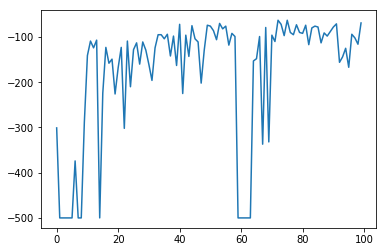

In [24]:
actor_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.01}
critic_kwargs = {'hidden_sizes' : [100,], 'learning_rate' : 0.01}
agent = SACAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs, batches=50)

episodes = 100
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)    
plt.plot(episode_rewards)

### 连续动作空间的确定性策略

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import gym
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow import keras

In [2]:
env=gym.make('Pendulum-v0')
env.seed(0)

[0]

In [3]:
class DQNReplayer:
    def __init__(self,capacity):
        self.memory=pd.DataFrame(index=range(capacity),columns=['observation','action','reward','next_observation','done'])
        self.i=0
        self.count=0
        self.capacity=capacity
        
    def store(self,*args):
        self.memory.loc[self.i]=args
        self.i=(self.i+1)%self.capacity
        self.count=min(self.count+1,self.capacity)
        
    def sample(self,size):
        indices=np.random.choice(self.count,size=size)
        return np.stack(self.memory.loc[indices,field] for field in self.memory.columns)

In [13]:
class OrnsteinUhlenbeckProcess:
    def __init__(self,size,mu=0,sigma=1,theta=.15,dt=.01):
        self.size=size
        self.mu=mu
        self.sigma=sigma
        self.theta=theta
        self.dt=dt
        
    def reset(self,x=0.):
        self.x=x*np.ones(self.size)
    
    def __call__(self):
        n=np.random.normal(size=self.size)
        self.x+=(self.theta*(self.mu-self.x)*self.dt+self.sigma*np.sqrt(self.dt)*n)
        return self.x

In [14]:
class DDPGAgent:
    def __init__(self,env,actor_kwargs,critic_kwargs,replayer_capacity=100000,replayer_initial_transitons=10000,gamma=0.99,batches=1,batch_size=64,net_learning_rate=0.005,noise_scale=0.1,explore=True):
        observation_dim=env.observation_space.shape[0]
        action_dim=env.action_space.shape[0]
        observation_action_dim=observation_dim+action_dim
        self.action_low=env.action_space.low
        self.action_high=env.action_space.high
        self.gamma=gamma
        self.net_learning_rate=net_learning_rate
        self.explore=explore
        
        self.batches=batches
        self.batch_size=batch_size
        self.replayer=DQNReplayer(replayer_capacity)
        self.replayer_initial_transitons=replayer_initial_transitons
        
        self.noise=OrnsteinUhlenbeckProcess(size=(action_dim,),sigma=noise_scale)
        self.noise.reset()
        
        self.actor_evaluate_net = self.build_network(input_size=observation_dim, **actor_kwargs)
        self.actor_target_net = self.build_network(input_size=observation_dim, **actor_kwargs)
        self.critic_evaluate_net = self.build_network(input_size=observation_action_dim, **critic_kwargs)
        self.critic_target_net = self.build_network(input_size=observation_action_dim, **critic_kwargs)
        
        self.update_target_net(self.actor_target_net,self.actor_evaluate_net)
        self.update_target_net(self.critic_target_net,self.critic_evaluate_net)
        
    def update_target_net(self,target_net,evaluate_net,learning_rate=1.):
        target_weights=target_net.get_weights()
        evaluate_weights=evaluate_net.get_weights()
        average_weights=[(1-learning_rate)*t+learning_rate*e for t,e in zip(target_weights,evaluate_weights)]
        target_net.set_weights(average_weights)
        
    def build_network(self,input_size,hidden_sizes,output_size=1,activation=tf.nn.relu,output_activation=None,loss=tf.losses.mse,learning_rate=0.001):
        model=keras.Sequential()
        for layer,hidden_size in enumerate(hidden_sizes):
            kwargs={'input_shape':(input_size,)} if layer==0 else {}
            model.add(keras.layers.Dense(units=output_size,activation=activation,**kwargs))
        model.add(keras.layers.Dense(units=output_size,activation=output_activation))
        optimizer=tf.optimizers.Adam(learning_rate)
        model.compile(optimizer=optimizer,loss=loss)
        return model
    
    def decide(self,observation):
        if self.explore and self.replayer.count<self.replayer_initial_transitons:
            return np.random.uniform(self.action_low,self.action_high)
        
        action=self.actor_evaluate_net.predict(observation[np.newaxis])[0]
        if self.explore:
            noise=self.noise()
            action=np.clip(action+noise,self.action_low,self.action_high)
        return action
    
    def learn(self,observation,action,reward,next_observation,done):
        self.replayer.store(observation,action,reward,next_observation,done)
        
        if self.replayer.count>=self.replayer_initial_transitons:
            if done:
                self.noise.reset()
                
            for batch in range(self.batches):
                observations,actions,rewards,next_observations,dones=self.replayer.sample(self.batch_size)
                
                observation_tensor=tf.convert_to_tensor(observations,dtype=tf.float32)
                with tf.GradientTape() as tape:
                    action_tensor=self.actor_evaluate_net(observation_tensor)
                    input_tensor=tf.concat([observation_tensor,action_tensor],axis=1)
                    q_tensor=self.critic_evaluate_net(input_tensor)
                    loss_tensor=-tf.reduce_mean(q_tensor)
                grad_tensors=tape.gradient(loss_tensor,self.actor_evaluate_net.variables)
                self.actor_evaluate_net.optimizer.apply_gradients(zip(grad_tensors,self.actor_evaluate_net.variables))
                
                next_actions=self.actor_evaluate_net.predict(next_observations)
                observation_actions=np.stack([observations,actions])
                next_observatoin_actions=np.stack([next_observations,next_actions])
                next_qs=self.critic_evaluate_net.predict(next_observatoin_actions)[:,0]
                targets=rewards+self.gamma*next_qs*(1-dones)
                self.critic_evaluate_net.fit(observations,targets,verbose=0)
                
                self.update_target_net(self.actor_target_net,self.actor_evaluate_net,self.net_learning_rate)
                self.update_target_net(self.critic_target_net,self.critic_evaluate_net,self.net_learning_rate)

In [21]:
def play_qlearning(env,agent,train=False,render=False):
    episode_reward=0
    observation=env.reset()
    while True:
        if render:
            env.render()
        action=agent.decide(observation)
        next_observation,reward,done,_=env.step(action)
        episode_reward+=reward
        if train:
            agent.learn(observation,action,reward,next_observation,done)
        if done:
            break
        observation=next_observation
    return episode_reward

In [23]:
actor_kwargs = {'hidden_sizes' : [32, 64], 'learning_rate' : 0.0001}
critic_kwargs = {'hidden_sizes' : [64, 128], 'learning_rate' : 0.001}
agent = DDPGAgent(env, actor_kwargs=actor_kwargs,critic_kwargs=critic_kwargs)

episodes = 100
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True,render=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)
env.close()